In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.metrics import r2_score

In [2]:
# Load the datasets
data = pd.read_csv('/home/freitas/ProjetoPraticoIA/DataSet/dataset.csv')
#just_features = pd.read_csv('/home/freitas/ProjetoPraticoIA/DataSet/just_features.csv')

In [3]:
# Prepare the data map the necessary parameters
# Mapping for 'tipo'
tipo_mapping = {'limousine': 0, 'coupe': 1, 'compacto': 2, 'kombi': 3, 'carrinha': 4, 'cabrio': 5, 'suv': 6, 'outro': 7}
data['tipo'] = data['tipo'].map(tipo_mapping)

# Mapping for 'caixa'
caixa_mapping = {'manual': 0, 'automatica': 1}
data['caixa'] = data['caixa'].map(caixa_mapping)

# Mapping for 'com_danos'
com_danos_mapping = {'nao': 0, 'sim': 1}
data['com_danos'] = data['com_danos'].map(com_danos_mapping)

# Mapping for 'combustivel'
combustivel_mapping = {'gasolina': 0, 'diesel': 1, 'outro': 2}
data['combustivel'] = data['combustivel'].map(combustivel_mapping)

# Mapping for 'marca' (assuming 'marca' has too many unique values)
marca_mapping = {marca: i for i, marca in enumerate(data['marca'].unique())}
data['marca'] = data['marca'].map(marca_mapping)

In [4]:
# Display the preprocessed data
data.describe()

,id,tipo,ano_registo,caixa,potencia,km,combustivel,marca,com_danos,preco
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,49878.823840,2.282600,2006.577600,0.251480,137.546760,121195.808000,0.431080,2.931400,0.087800,7876.264120
std,28932.226902,1.830386,4.283129,0.433872,214.565586,41268.626786,0.530341,2.583951,0.283009,11657.351891
min,1.000000,0.000000,2000.000000,0.000000,3.000000,5000.000000,0.000000,0.000000,0.000000,1.000000
25%,24673.750000,0.000000,2003.000000,0.000000,90.000000,90900.000000,0.000000,1.000000,0.000000,2389.000000
50%,49997.500000,2.000000,2006.000000,0.000000,122.000000,150100.000000,0.000000,2.000000,0.000000,5030.000000
75%,75016.500000,3.000000,2010.000000,1.000000,163.000000,150600.000000,1.000000,5.000000,0.000000,10020.000000
max,99998.000000,7.000000,2017.000000,1.000000,16312.000000,151000.000000,2.000000,9.000000,1.000000,745060.000000


In [5]:
y = data['preco']

In [6]:
# Set current year
current_year = 2024

In [7]:
# Tranform ano_registo into car age
data['idade'] = current_year - data['ano_registo']

In [11]:
data.head()

,id,tipo,ano_registo,caixa,potencia,km,combustivel,marca,com_danos,preco,idade
0,26713,0,2014,0,140,40800,0,0,0,14200,10
1,49553,0,2013,0,184,30300,1,1,0,25840,11
2,9007,1,2009,0,177,150900,1,1,0,9990,15
3,21152,2,2006,0,54,150500,0,2,0,3250,18
4,37819,0,2015,0,150,40600,1,2,0,16939,9


In [6]:
# The input and output features preparation
X = data.drop(['preco', 'id', 'ano_registo'], axis = 1)

In [7]:
X.shape

(25000, 8)

In [8]:
print(X[:10])

   tipo  ano_registo  caixa  potencia      km  combustivel  marca  com_danos
0     0         2014      0       140   40800            0      0          0
1     0         2013      0       184   30300            1      1          0
2     1         2009      0       177  150900            1      1          0
3     2         2006      0        54  150500            0      2          0
4     0         2015      0       150   40600            1      2          0
5     0         2002      0       179  150000            0      3          0
6     3         2014      0       110   60300            1      4          0
7     2         2006      0        43  125600            0      0          0
8     3         2011      0       125   70400            0      3          0
9     0         2009      1       116  125800            0      4          0


In [0]:
# Spliting the data into training and testing dataset
from sklearn.model_selection import train_test_split
# Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# GridSearchCV for Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [ ]:
# Instantiation of the model
model = RandomForestRegressor(random_state = 84)

In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X, y)  # X and y should be replaced with your data and target variable

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

In [ ]:
# Fitting the model
price_rf = model.fit(X_train, y_train)

In [ ]:
# Training model evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [ ]:
# The training r_sq
print(f'The trained r_sq is: %.2f'%price_rf.score(X_train, y_train))

In [ ]:
y_train_pred = price_rf.predict(X_train)

In [ ]:
# The MAE
print('The MAE is: %.2f'%mean_absolute_error(y_train, y_train_pred))

In [ ]:
# The MSE
print('The MSE is: %.2f'%mean_squared_error(y_train, y_train_pred))

In [ ]:
# THE RMSE
import numpy as np
print('The RMSE is: %.2f'%np.sqrt(mean_squared_error(y_train, y_train_pred)))

In [ ]:
# The EVS
print('The EVS is: %.2f'%explained_variance_score(y_train, y_train_pred))

In [124]:
# Prediction on testing data
y_test_pred = price_rf.predict(X_test)

In [125]:
print(y_test_pred[:100])

[ 2715.30666667  7453.245       8777.5475      4670.08089286
  8777.8975      1271.36611905  5599.1325      6240.79083333
  9454.42875      952.08696726 10361.9425      2541.3775
  8042.75125     3202.84416667  2886.61339286  1256.728125
  3885.2725       874.39        2899.91458333  9481.50020833
  9743.36354167 14592.1975      3452.345       4390.73541667
 13077.845       1547.36125    39645.86       16511.23154762
  9629.35910714 25535.99       12261.4675      9751.28
  6839.79279167 10895.56333333  1110.22083333  9757.5125
  2571.52041667  9705.6925      5092.86666667 12166.15205357
 25219.835       3559.42991667  6358.18583333 11451.71416667
  2252.89625    10477.89       13628.0375      3168.07916667
  3333.64916667  5751.585       1602.06775    31231.4
 12461.63        1975.620875    1041.08675595  8413.225
  7227.575       1881.26968155   930.43        5283.0225
 10695.85541667  2835.21125     1196.56629167  1347.7575
  7807.9575     29132.66125     2470.78922619  2083.199375
 

In [126]:
# The testing coef. of determination
print('The testing r_sq is: %.2f'% r2_score(y_test, y_test_pred))

The testing r_sq is: 0.77


In [127]:
# Or
print('The testing r_sq is: %.2f'% price_rf.score(X_test, y_test))

The testing r_sq is: 0.77


In [128]:
# The metrics

In [129]:
#The MAE
print('The MAE IS: %.2f'%mean_absolute_error(y_test, y_test_pred))

The MAE IS: 1867.21


In [130]:
#The MSE
print('The MSE IS: %.2f'%mean_squared_error(y_test, y_test_pred))

The MSE IS: 43484100.35


In [131]:
# THE RMSE
print('The RMSE IS: %.2f'%np.sqrt(mean_squared_error(y_test, y_test_pred)))

The RMSE IS: 6594.25


In [132]:
# The EVS
print('The EVS is: %.2f'% explained_variance_score(y_test, y_test_pred))

The EVS is: 0.77


In [133]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


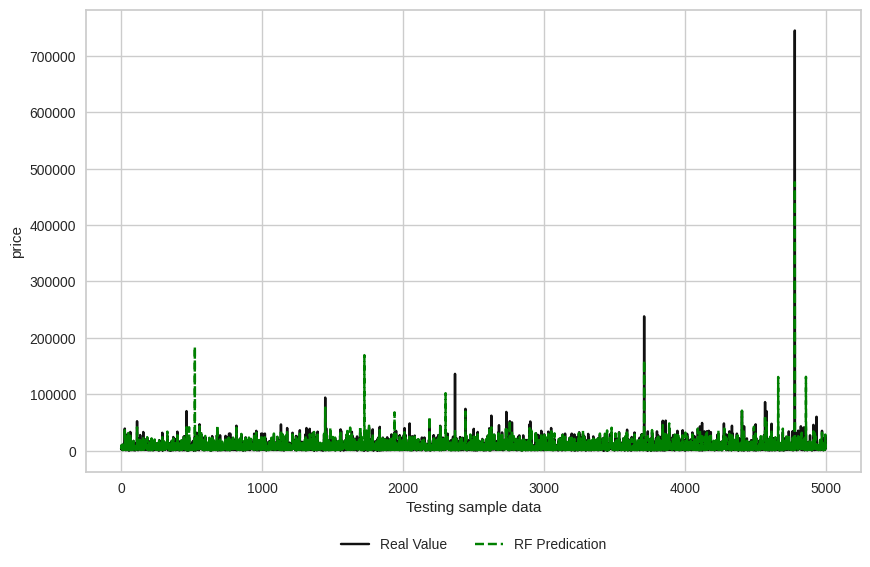

In [134]:
# Plotting the observed and predicted data
import matplotlib.pyplot as plt
# Setting the boundaries and parameters
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(len(X_test))
#Ploting
plt.plot(x_ax, y_test, label = 'Real Value', color = 'k', linestyle = '-')
plt.plot(x_ax, y_test_pred, label = 'RF Predication', color = 'green', linestyle = '--')
plt.ylabel('price')
plt.xlabel('Testing sample data')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)
plt.show()

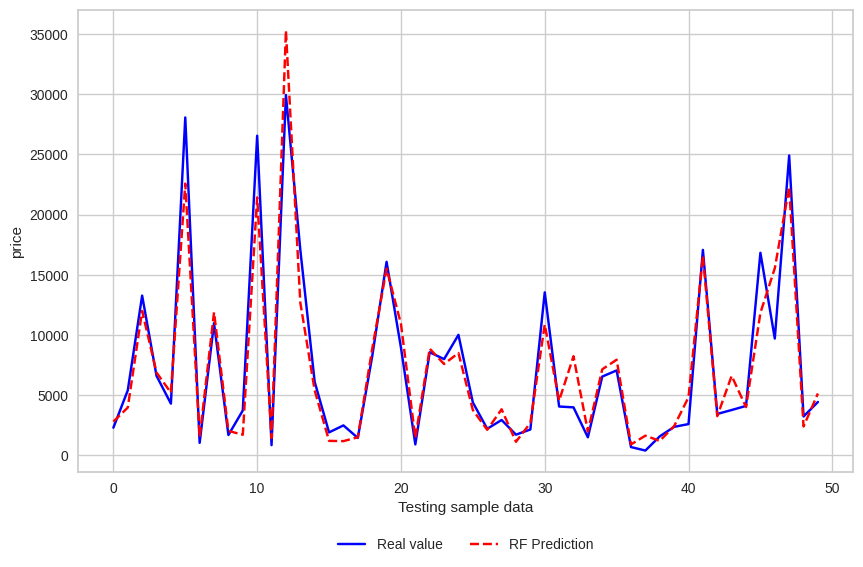

In [135]:
# Plot a more visualized view
import random as rd

# Setting the boundaries and parameters
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(0, 50)
# Setting random search plot

st = rd.randint(0, 4550) #start
nd = st + 50 #end

# Plotting
plt.plot(x_ax, y_test[st:nd], label = 'Real value', color = 'blue', linestyle = '-')
plt.plot(x_ax, y_test_pred[st:nd], label = 'RF Prediction', color = 'red', linestyle = '--')
plt.ylabel('price')
plt.xlabel('Testing sample data')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)
plt.show()

In [136]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


/home/freitas/PycharmProjects/ProtocolodeClassificacao/venv/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


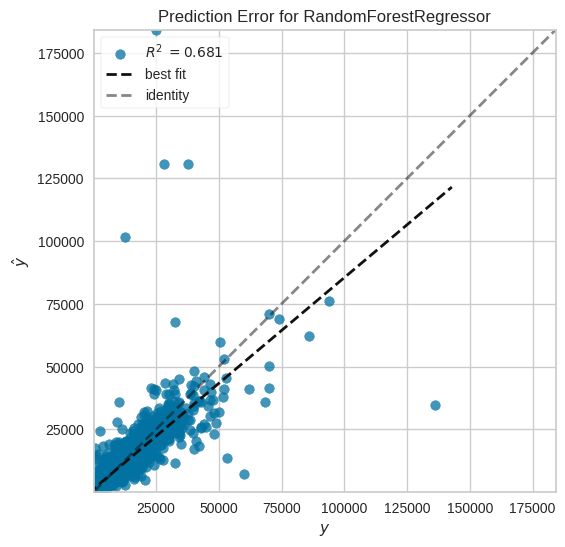

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [137]:
from yellowbrick.regressor import PredictionError

# For plotting clarity concatenated redundant values
lower_bound = 100
upper_bound = 150000

# Filter X_test and y_test based on the desired range
indices_within_range = np.where((y_test >= lower_bound) & (y_test <= upper_bound))[0]
X_test_within_range = X_test.iloc[indices_within_range]
y_test_within_range = y_test.iloc[indices_within_range]

# Create PredictionError visualizer with the filtered data
visualizer = PredictionError(price_rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test_within_range, y_test_within_range)
visualizer.poof()

/home/freitas/PycharmProjects/ProtocolodeClassificacao/venv/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


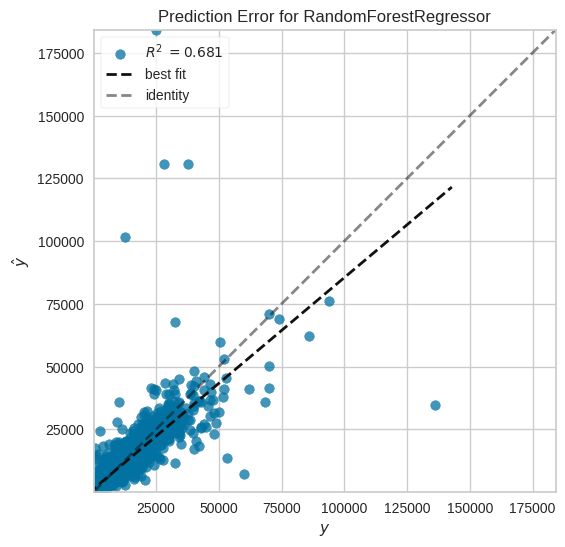

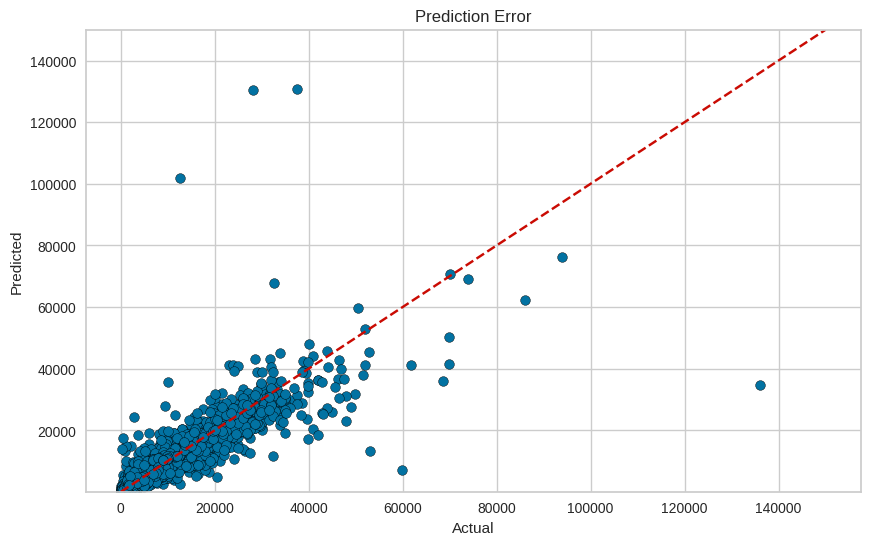

In [138]:
from yellowbrick.regressor import PredictionError
import matplotlib.pyplot as plt
import numpy as np

# Assuming your desired lower and upper bounds are 100 and 150000, respectively
lower_bound = 100
upper_bound = 150000

# Filter X_test and y_test based on the desired range
indices_within_range = np.where((y_test >= lower_bound) & (y_test <= upper_bound))[0]
X_test_within_range = X_test.iloc[indices_within_range]
y_test_within_range = y_test.iloc[indices_within_range]

# Create PredictionError visualizer with the filtered data
visualizer = PredictionError(price_rf)
visualizer.fit(X_train, y_train)

# Predict on the filtered test data
y_pred_within_range = price_rf.predict(X_test_within_range)

# Filter predicted values within the specified range
indices_y_pred_within_range = np.where((y_pred_within_range >= lower_bound) & (y_pred_within_range <= upper_bound))[0]
y_test_within_range_filtered = y_test_within_range.iloc[indices_y_pred_within_range]
y_pred_within_range_filtered = y_pred_within_range[indices_y_pred_within_range]

# Fit the visualizer on the filtered test data and predicted values within the range
visualizer.score(X_test_within_range, y_test_within_range)
visualizer.poof()

# Set the y-axis limits to display only the specified range for both y and y_hat
plt.ylim(lower_bound, upper_bound)
plt.scatter(y_test_within_range_filtered, y_pred_within_range_filtered, edgecolors=(0, 0, 0))
plt.plot([lower_bound, upper_bound], [lower_bound, upper_bound], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Prediction Error')
plt.show()


/home/freitas/PycharmProjects/ProtocolodeClassificacao/venv/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


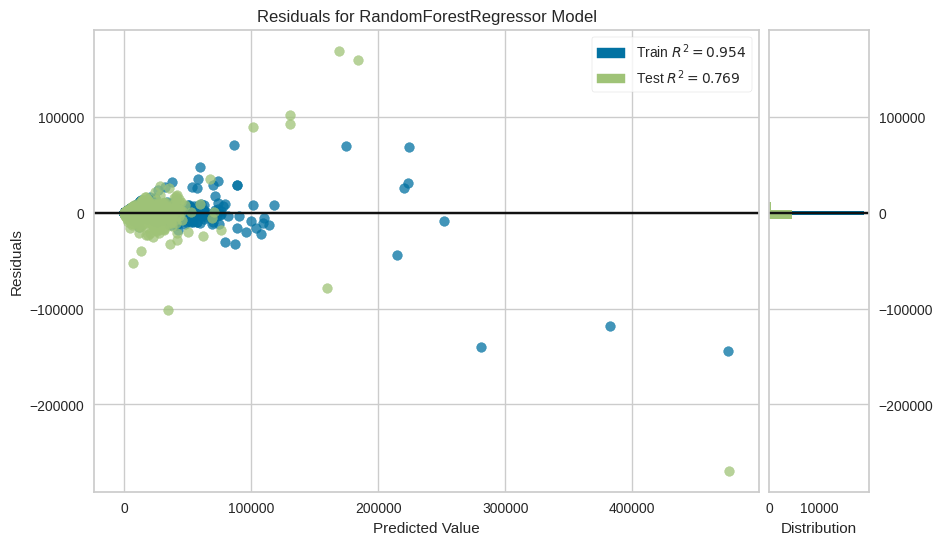

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [139]:
# Plotting Residuals
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(price_rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [140]:
# The k-fold CV
from sklearn.model_selection import cross_val_score

In [141]:
seed = 5 #set to fixed value to check same result

In [142]:
# Training model CV
score_train = cross_val_score(price_rf, X_train, y_train, scoring='neg_mean_squared_error', cv = 10)

In [143]:
score_train

array([-2.31410686e+07, -1.10556369e+07, -1.11748822e+07, -2.32286849e+07,
       -1.15378072e+08, -1.35658605e+07, -6.84499594e+07, -7.61918808e+07,
       -5.15473724e+07, -1.66826943e+07])

In [144]:
# The mean score
print(score_train.mean())

-41041611.15544821


In [145]:
# The absolute mean score
print(abs(score_train.mean()))

41041611.15544821


In [146]:
# The testing model CV
score_test = cross_val_score(price_rf, X_test, y_test, scoring='neg_mean_squared_error', cv = 10)

In [147]:
score_test

array([-9.32823456e+06, -1.12733113e+07, -1.45231978e+07, -2.58811719e+08,
       -1.58192861e+08, -1.31489356e+07, -9.12740040e+06, -3.29006335e+07,
       -2.87755014e+07, -9.56013880e+08])

In [148]:
# The mean score
print(score_train.mean())

-41041611.15544821


In [149]:
# The absolute mean score
print(abs(score_train.mean()))

41041611.15544821


In [150]:
# Random Forest Feature Ranking
from sklearn.pipeline import Pipeline

In [151]:
f_list = list(X.columns)
f_importance = pd.Series(price_rf.feature_importances_, index = f_list).sort_values(ascending=False)

In [152]:
print(f_importance)

potencia       0.414722
ano_registo    0.335409
km             0.148633
caixa          0.046587
marca          0.025503
tipo           0.019488
combustivel    0.006251
com_danos      0.003406
dtype: float64


In [153]:

# Data preprocessing
# You may need to perform additional data preprocessing steps based on your dataset

# Split the dataset into features and target variable
X = data.drop('preco', axis=1)  # Features
y = data['preco']  # Target variable

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters

# Fit the model
model.fit(X, y)

# Use the trained model to predict prices for just_features dataset
predicted_prices = model.predict(just_features)

# Create a DataFrame with predicted prices and IDs
predicted_df = pd.DataFrame({'id': just_features['id'], 'preco': predicted_prices})

# Save the predicted prices to a CSV file
predicted_df.to_csv('precos_estimados.csv', index=False)

# Evaluate the model (optional)
# Split the data for evaluation (if needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')


NameError: name 'just_features' is not defined